In [2]:
%pylab inline

from matplotlib import animation
import datetime
from celestialbody import celestialbody
from celestialbody.celestialbody import CelestialBody
from fitting.fitting import Fit
import astropy.constants as const
from celestialbody import display

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)

Populating the interactive namespace from numpy and matplotlib


# Kepler's problem

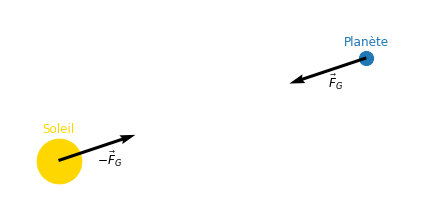

In [112]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_aspect("equal")
ax.axis('off')

x, y = 3, 1

ax.scatter(0,0, marker="o", color="gold", s=2000)
ax.annotate("Soleil", (0,0), color="gold", textcoords="offset points", xytext=(0,25),
            horizontalalignment='center', verticalalignment='bottom', alpha=1, fontsize="large")
ax.quiver(0,0, x/4,y/4, scale=1, angles='xy', scale_units='xy')
ax.annotate(r"$-\vec{F}_{G}$", (x/8, y/8), color="k", textcoords="offset points", xytext=(0,-2),
            horizontalalignment='left', verticalalignment='top', alpha=1, fontsize="large")

ax.scatter(x,y, marker="o", color="C0", s=200)
ax.annotate("Planète", (x,y), color="C0", textcoords="offset points", xytext=(0,10),
            horizontalalignment='center', verticalalignment='bottom', alpha=1, fontsize="large")
ax.quiver(x,y, -x/4,-y/4, scale=1, angles='xy', scale_units='xy')
ax.annotate(r"$\vec{F}_{G}$", (x-x/8, y-y/8), color="k", textcoords="offset points", xytext=(0,-2),
            horizontalalignment='left', verticalalignment='top', alpha=1, fontsize="large")

ax.set_xlim(-.5, x+.5)
ax.set_ylim(-.5, y+.5)

mysavefig("kepler_problem.png")

# body.data("position", start=debut, stop=fin, step=pas)

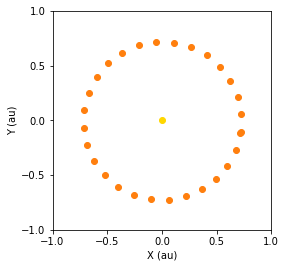

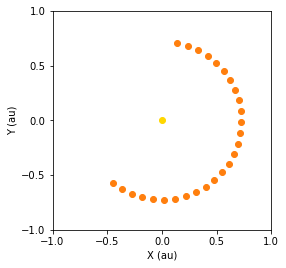

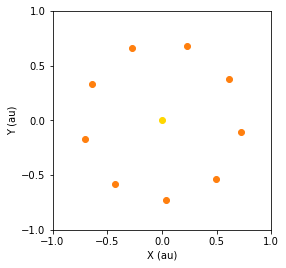

In [2]:
body = CelestialBody("Venus")

debut = datetime.datetime(2021,1,1)
fin   = datetime.datetime(2021,5,13)
pas   = 25

positions_default = body.data("position")
positions_startstop = body.data("position", start=debut, stop=fin)
positions_step = body.data("position", step=pas)

for i, positions in enumerate([positions_default, positions_startstop, positions_step]):
    fig = plt.figure(figsize=(4,4))
    sps = (1, 1)
    ax = plt.subplot2grid(sps, (0, 0))
    x, y = positions[:,0],  positions[:,1]
    ax.plot(x,y,"oC1")

    ax.plot([0], [0] ,"o", color="gold")
    ax.set_aspect("equal")
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    ax.set_xticks([-1, -.5, 0, .5, 1])
    ax.set_yticks([-1, -.5, 0, .5, 1])
    
    mysavefig("positions_"+str(i)+".png")

# File creator

In [261]:
body = CelestialBody("Jupiter")

# Création d'un fichier jupiter.txt contenant les coordonnées cartésiennes x,y
body.data_position_txt(start=debut, stop=fin, step=pas, cols="xy")

# Ptolemy vs Copernicus

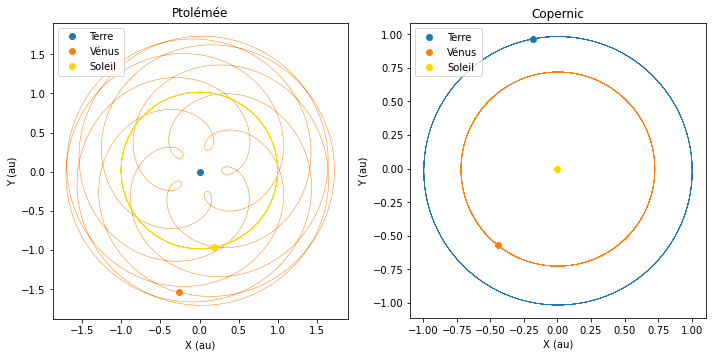

In [14]:
start       = datetime.datetime(2021, 1, 1)
stop        = datetime.datetime(2029, 1, 1)
step        = 2
names       = ["Earth", "Venus"]

fig = plt.figure(figsize=(10, 6))
ax1 = plt.subplot2grid((1,2), (0, 0))
ax2 = plt.subplot2grid((1,2), (0, 1))

for ax, ref in zip([ax1, ax2], ["Earth", "Sun"]):
    names, coord_sun, coord_ref, dates = display.prepare_data(names, ref=ref, start=start, stop=stop, step=step)

    Xs, Ys, Zs = coord_ref

    for X, Y in zip(Xs, Ys):
        ax.plot(X,Y)
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    ax.clear()

    positions, trajectories = [], []
    for i, name in enumerate(names[:-1]):
        if name == "Sun":
            label = "Soleil"
            color = "gold"
        elif name == "Earth":
            label = "Terre"
            color = "C"+str(i)
        elif name == "Venus":
            label = "Vénus"
            color = "C"+str(i)
        position,   = ax.plot([], [], "o", color=color, label=label)
        trajectory, = ax.plot([], [], "-", color=color, linewidth=.5)
        positions.append(position)
        trajectories.append(trajectory)

    for X, Y, position, trajectory in zip(Xs, Ys, positions, trajectories):
        position.set_data(X[0], Y[0])
        trajectory.set_data(X, Y)

    ax.legend(loc="upper left")
    ax.set_aspect("equal")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel("X (au)")
    ax.set_ylabel("Y (au)")
    names       = ["Earth", "Venus"]

ax1.set_title("Ptolémée")
ax2.set_title("Copernic")

mysavefig("ptolemy_vs_copernicus.png")

# Kepler third law

15P/Finlay 0.72046703


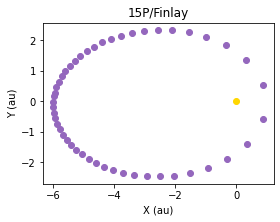

In [29]:
body = CelestialBody("Finlay", category="comet")
print(body.fullname, body.e)

debut = datetime.datetime(2018,1,1)
pas   = 50
fin   = debut + datetime.timedelta(days=body.period)

positions = body.data("position", start=debut, stop=fin, step=pas)

fig = plt.figure(figsize=(4,4))
sps = (1, 1)
ax = plt.subplot2grid(sps, (0, 0))
x, y = positions[:,0],  positions[:,1]
ax.plot(x,y,"oC4")

ax.plot([0], [0] ,"o", color="gold")
ax.set_aspect("equal")
ax.set_xlabel("X (au)")
ax.set_ylabel("Y (au)")
#ax.set_xlim(-1,1)
#ax.set_ylim(-1,1)
ax.set_title(body.fullname)
    
mysavefig("kepler_third_law_"+body.name+"_complete.png")

Value computed:
1.9818746899757038e+30 +/- 4.454118087235449e+25
1.988409870698051e+30 +/- 4.468805426856864e+25


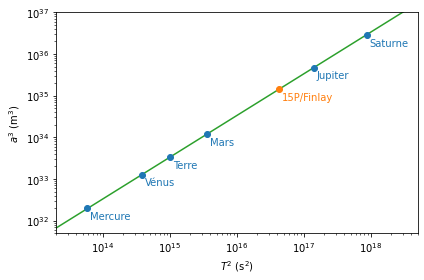

In [132]:
# fit in log scale
fig = plt.figure(figsize=(6,4))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

au = const.au.value

names = ["Mercure", "Vénus", "Terre", "Mars", "Jupiter", "Saturne"]
periods       = np.array([87.77, 224.70, 365.25, 686.95, 4332.62, 10759.2])*24*3600
u_periods     = np.array([.01, .01, .01, .01, .01, .1])*24*3600
semimajoraxes = np.array([0.389, 0.724, 1, 1.524, 5.2, 9.510])*au
u_semimajoraxes=np.array([.001, .001, .001, .001, .1, .001])*au

fitter = Fit("linear", x=periods**2, y=semimajoraxes**3, uy=u_semimajoraxes, ux=u_periods, verbosemode=False)
fit_params, u_params = fitter.fit()
slope, y0 = fit_params
u_slope, u_y0 = u_params

x = np.logspace(6, 10)
if True:
    ax.loglog(x**2, slope * x**2, "C2")
if True:
    for name, p, a in zip(names, periods, semimajoraxes):
        ax.annotate(name, (p**2,a**3), color="C0", textcoords="offset points", xytext=(3,-3),
                    horizontalalignment='left', verticalalignment='top', alpha=1)
    ax.loglog(periods**2, semimajoraxes**3, "oC0")

ax.loglog(np.array([body.period*24*3600])**2, np.array([body.a*au])**3, "oC1")
ax.annotate(body.fullname, ((body.period*24*3600)**2,(body.a*au)**3), color="C1", textcoords="offset points", xytext=(3,-3),
            horizontalalignment='left', verticalalignment='top', alpha=1)

ax.set_xlabel(r"$T^2$ $(\mathrm{s}^2)$")
ax.set_ylabel(r"$a^3$ $(\mathrm{m}^3)$")
ax.set_xlim(2e13, 5e18)
ax.set_ylim(5e31, 1e37)

mysavefig("kepler_third_law_3.png")

M_sun   = (4*np.pi**2*slope/const.G).value
u_M_sun_squared = ((4*np.pi**2*slope/const.G**2 * const.G.uncertainty)**2).value + ((4*np.pi**2/const.G * u_slope)**2).value

print("Value computed:")
print(M_sun, "+/-", np.sqrt(u_M_sun_squared))
print(const.M_sun.value, "+/-", const.M_sun.uncertainty)

# Energy conservation

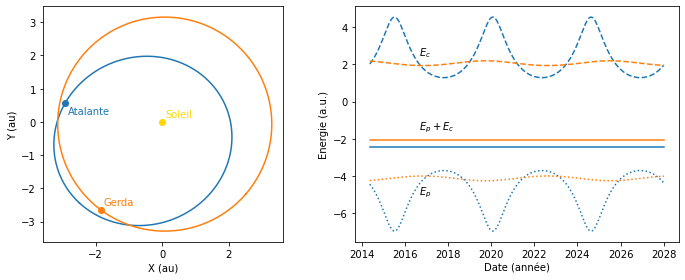

In [49]:
fig = plt.figure(figsize=(10,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

body = CelestialBody("Atalante")
T = body.period
start = datetime.datetime.today() - datetime.timedelta(days=1.5*T)
stop  = start + datetime.timedelta(days=3*T)
step  = int(body.period/101)

K = body.data("kinetic_energy_per_kilogram", start=start, stop=stop, step=step)
P = body.data("potential_energy_per_kilogram", start=start, stop=stop, step=step)
t = body.data("date", start=start, stop=stop, step=step)
ax2.plot(t, K/1e19, "--C0")
ax2.plot(t, P/1e19, ":C0")
ax2.plot(t, (K+P)/1e19, "-C0", label=body.name)

body.date = datetime.datetime.today()
x,y,z = body.position
orbit = body.orbit
ax1.plot(orbit[0], orbit[1], "-C0")
ax1.plot([x], [y], "oC0")
ax1.annotate(body.name, (x,y), color="C0", textcoords="offset points", xytext=(3,-3),
            horizontalalignment='left', verticalalignment='top', alpha=1)

body = CelestialBody("Gerda")
start = datetime.datetime.today() - datetime.timedelta(days=1.5*T)
stop  = start + datetime.timedelta(days=3*T)
step  = int(body.period/101)

K = body.data("kinetic_energy_per_kilogram", start=start, stop=stop, step=step)
P = body.data("potential_energy_per_kilogram", start=start, stop=stop, step=step)
t = body.data("date", start=start, stop=stop, step=step)
ax2.plot(t, K/1e19, "--C1")
ax2.plot(t, P/1e19, ":C1")
ax2.plot(t, (K+P)/1e19, "-C1", label=body.name)

body.date = datetime.datetime.today()
x,y,z = body.position
orbit = body.orbit
ax1.plot(orbit[0], orbit[1], "-C1")
ax1.plot([x], [y], "oC1")
ax1.annotate(body.name, (x,y), color="C1", textcoords="offset points", xytext=(3,3),
            horizontalalignment='left', verticalalignment='bottom', alpha=1)

ax1.set_aspect("equal")
ax1.plot([0], [0], "o", color="gold")
ax1.annotate("Soleil", (0,0), color="gold", textcoords="offset points", xytext=(3,3),
            horizontalalignment='left', verticalalignment='bottom', alpha=1)
ax1.set_xlabel("X (au)")
ax1.set_ylabel("Y (au)")

ax2.set_xlabel("Date (année)")
ax2.set_ylabel("Energie (a.u.)")
ax2.annotate(r"$E_c$", (datetime.datetime.today()-datetime.timedelta(days=T),2.5))
ax2.annotate(r"$E_p$", (datetime.datetime.today()-datetime.timedelta(days=T),-5))
ax2.annotate(r"$E_p+E_c$", (datetime.datetime.today()-datetime.timedelta(days=T),-1.5))

mysavefig("energy_conservation.png")